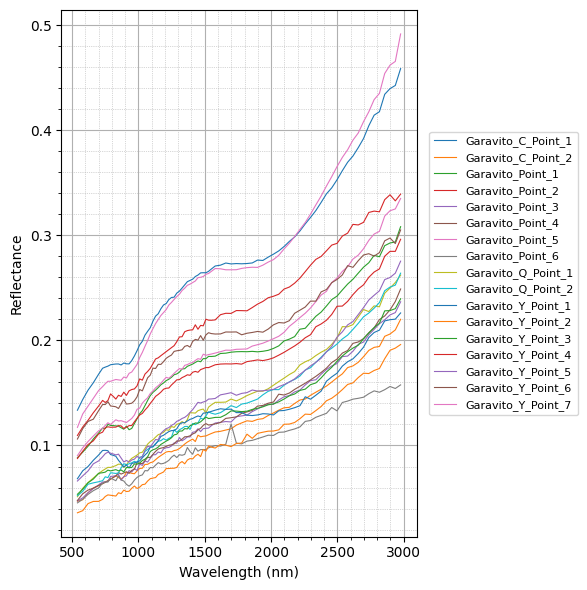

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Path to the folder containing spectral data
spectra_folder = r"D:\Tesis_GIS_Luna\Luna\M3\Reflectance  L2\20250213T180654006119\Spectrum_data\All_spectra"
files = glob.glob(os.path.join(spectra_folder, "*.txt"))

plt.figure(figsize=(6, 6))  # un poco más ancho para dar espacio a la leyenda

for file in files:
    try:
        # Cargar datos omitiendo cabecera
        data = np.loadtxt(file, skiprows=4)

        if data.shape[1] < 2:
            print(f"{file} tiene menos de 2 columnas, se omite.")
            continue

        wavelength = data[:, 0]
        reflectance1 = data[:, 1]
        name = os.path.basename(file).replace(".txt", "")

        plotted = False

        # Si hay 3 columnas, elegir la que tenga datos válidos
        if data.shape[1] >= 3:
            reflectance2 = data[:, 2]
            mask1 = reflectance1 > 0
            mask2 = reflectance2 > 0

            if np.any(mask1):
                plt.plot(wavelength[mask1], reflectance1[mask1], label=f"{name}", linewidth=0.8)
                plotted = True
            elif np.any(mask2):
                plt.plot(wavelength[mask2], reflectance2[mask2], label=f"{name}", linewidth=0.8)
                plotted = True

        else:
            mask1 = reflectance1 > 0
            if np.any(mask1):
                plt.plot(wavelength[mask1], reflectance1[mask1], label=f"{name}", linewidth=0.8)
                plotted = True

        if not plotted:
            print(f"{file} no tiene datos válidos.")

    except Exception as e:
        print(f"Error leyendo {file}: {e}")

# Ejes, título y rejilla
plt.minorticks_on()
plt.grid(True, which="major", linestyle="-", linewidth=0.8)
plt.grid(True, which="minor", linestyle=":", linewidth=0.5)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
#plt.title("Garavito Y Spectral Data")
#plt.ylim(0, 0.7)

# Leyenda fuera del área del gráfico
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=8)

plt.tight_layout()
plt.show()

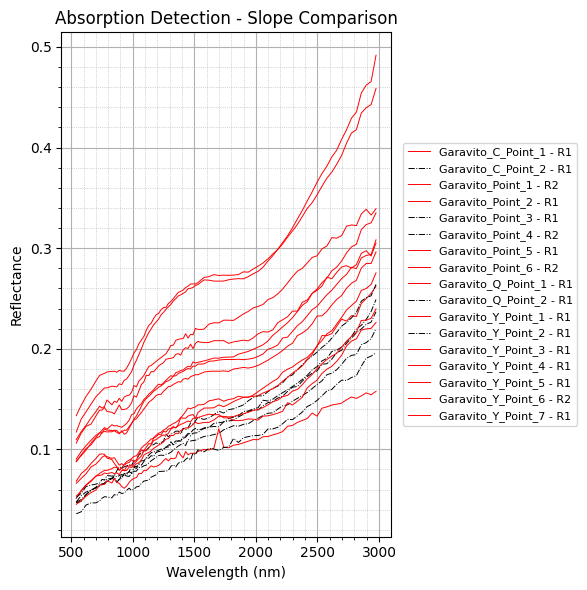


Spectra WITHOUT absorption (similar slopes):
  - Garavito_C_Point_2.txt
  - Garavito_Point_3.txt
  - Garavito_Point_4.txt
  - Garavito_Q_Point_2.txt
  - Garavito_Y_Point_2.txt

Spectra WITH absorption (distinct slopes):
  - Garavito_C_Point_1.txt
  - Garavito_Point_1.txt
  - Garavito_Point_2.txt
  - Garavito_Point_5.txt
  - Garavito_Point_6.txt
  - Garavito_Q_Point_1.txt
  - Garavito_Y_Point_1.txt
  - Garavito_Y_Point_3.txt
  - Garavito_Y_Point_4.txt
  - Garavito_Y_Point_5.txt
  - Garavito_Y_Point_6.txt
  - Garavito_Y_Point_7.txt


In [11]:
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Path to the folder containing the spectra
spectra_folder = r"D:\Tesis_GIS_Luna\Luna\M3\Reflectance  L2\20250213T180654006119\Spectrum_data\All_spectra"
files = glob.glob(os.path.join(spectra_folder, "*.txt"))

plt.figure(figsize=(6, 6))
no_absorption = []
with_absorption = []

# Define wavelength ranges
lambda1_start, lambda1_end = 540, 700
lambda2_start, lambda2_end = 800, 900
threshold = 0.0001005  # Adjust based on your case

for file in files:
    try:
        data = np.loadtxt(file, skiprows=4)

        if data.shape[1] < 2:
            print(f"{file} has fewer than 2 columns, skipping.")
            continue

        wavelength = data[:, 0]
        reflectance = None
        label_suffix = ""

        reflectance1 = data[:, 1]
        mask1 = reflectance1 > 0
        if np.any(mask1):
            reflectance = reflectance1
            mask = mask1
            label_suffix = "R1"

        elif data.shape[1] >= 3:
            reflectance2 = data[:, 2]
            mask2 = reflectance2 > 0
            if np.any(mask2):
                reflectance = reflectance2
                mask = mask2
                label_suffix = "R2"

        if reflectance is None:
            continue

        x = wavelength[mask]
        y = reflectance[mask]

        # Indices near the target points
        idx1a = np.argmin(np.abs(x - lambda1_start))
        idx1b = np.argmin(np.abs(x - lambda1_end))
        idx2a = np.argmin(np.abs(x - lambda2_start))
        idx2b = np.argmin(np.abs(x - lambda2_end))

        # Calculate slopes
        slope1 = (y[idx1b] - y[idx1a]) / (x[idx1b] - x[idx1a])  # 540–700 nm
        slope2 = (y[idx2b] - y[idx2a]) / (x[idx2b] - x[idx2a])  # 800–900 nm

        # Compare slope difference
        difference = abs(slope1 - slope2)

        if difference <= threshold:  # Similar slopes → no absorption
            color = "black"
            style = "-."
            no_absorption.append(os.path.basename(file))
        else:  # Distinct slopes → absorption present
            color = "red"
            style = "-"
            with_absorption.append(os.path.basename(file))

        name = os.path.basename(file).replace(".txt", "")
        plt.plot(x, y, label=f"{name} - {label_suffix}", color=color, linewidth=0.7, linestyle=style)

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Plot
plt.minorticks_on()
plt.grid(True, which="major", linestyle="-", linewidth=0.8)
plt.grid(True, which="minor", linestyle=":", linewidth=0.5)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=8)
plt.title("Absorption Detection - Slope Comparison")
plt.tight_layout()
plt.show()

# Results
print("\nSpectra WITHOUT absorption (similar slopes):")
for s in no_absorption:
    print(f"  - {s}")

print("\nSpectra WITH absorption (distinct slopes):")
for s in with_absorption:
    print(f"  - {s}")
